In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np

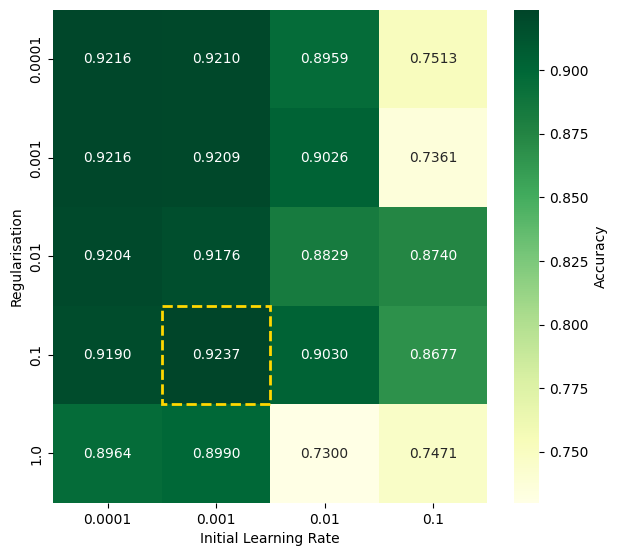

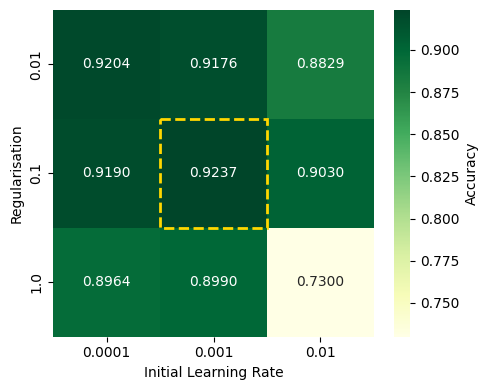

In [171]:
# logreg grid search

lr_gs = pd.read_csv('../grid_search_data/mlp_logreg_grid_search_alpha_0.0001_0.001_0.01_0.1_1_learning_rate_init_0.0001_0.001_0.01_0.1.csv')

heatmap_data = lr_gs.pivot(index="param_alpha", columns="param_learning_rate_init", values="mean_test_score")

# Plotting the heatmap
plt.figure(figsize=(7, 6.4))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGn", cbar_kws={'label': 'Accuracy'})

# Highlight the best score
max_val = heatmap_data.max().max()  # Find the maximum value in the pivoted data
best_loc = heatmap_data.stack().idxmax()

row, col = best_loc  # Unpack the tuple
col_idx = heatmap_data.columns.get_loc(col)  # Get column index
row_idx = heatmap_data.index.get_loc(row)  # Get row index
rect = Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='gold', lw=2, linestyle="--")
ax.add_patch(rect)

plt.xlabel("Initial Learning Rate")
plt.ylabel("Regularisation")
plt.show()


# filter for result section plot
# Choose specific alpha and learning rate values
selected_alphas = [0.01, 0.1, 1.0]  
selected_learning_rates = [0.0001, 0.001, 0.01]  
# Filter the DataFrame based on selected values
filtered_lr_gs = lr_gs[lr_gs["param_alpha"].isin(selected_alphas) & lr_gs["param_learning_rate_init"].isin(selected_learning_rates)]

# Pivot the filtered data
heatmap_data = filtered_lr_gs.pivot(index="param_alpha", columns="param_learning_rate_init", values="mean_test_score")

# Plotting the heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGn", cbar_kws={'label': 'Accuracy'})

# Highlight the best score
max_val = heatmap_data.max().max()  # Find the maximum value in the pivoted data
best_loc = heatmap_data.stack().idxmax()

row, col = best_loc  # Unpack the tuple
col_idx = heatmap_data.columns.get_loc(col)  # Get column index
row_idx = heatmap_data.index.get_loc(row)  # Get row index
rect = Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='gold', lw=2, linestyle="--")
ax.add_patch(rect)

plt.xlabel("Initial Learning Rate")
plt.ylabel("Regularisation")
plt.tight_layout()
plt.savefig('../figures/logreg_gs_results.pdf')
plt.show()

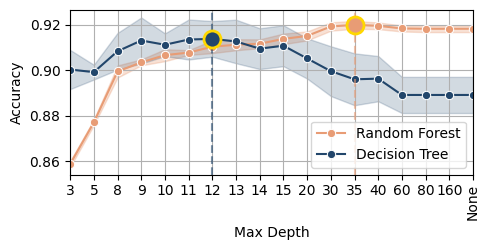

In [5]:
# Decision tree max depth search
import cmcrameri.cm as cmc
dt_gs = pd.read_csv('../grid_search_data/dt_grid_search_lineplot.csv')
rf_gs = pd.read_csv('../grid_search_data/rf_grid_search_lineplot.csv')


dt_gs["ordinal_x"] = range(len(dt_gs))  # Assign evenly spaced values based on order
rf_gs["ordinal_x"] = range(len(rf_gs))  # Assign evenly spaced values based on order
cmap = cmc.lipari(np.linspace(0.15,1,8))
dt_col = cmap[0]#'#ba7c6f'
rf_col = cmap[5]#'#5c9c6b'

plt.figure(figsize=(5, 2.6))
# random forest
sns.lineplot(
    data=rf_gs,
    x="ordinal_x",
    y="mean_test_score",
    label="Random Forest",
    marker='o',
    legend=False,
    c=rf_col
)
plt.fill_between(
    rf_gs["ordinal_x"],
    rf_gs["mean_test_score"] - rf_gs["std_test_score"],
    rf_gs["mean_test_score"] + rf_gs["std_test_score"],
    alpha=0.3,
    color=rf_col
)

# decission tree
sns.lineplot(
    data=dt_gs,
    x="ordinal_x",
    y="mean_test_score",
    label="Decision Tree",
    marker='o',
    legend=False,
    c=dt_col
)
plt.fill_between(
    dt_gs["ordinal_x"],
    dt_gs["mean_test_score"] - dt_gs["std_test_score"],
    dt_gs["mean_test_score"] + dt_gs["std_test_score"],
    alpha=0.2,
    color=dt_col
)

plt.axvline(dt_gs[dt_gs["param_max_depth"] == 12].index[0], c=dt_col, ls='--', alpha=0.6)
plt.axvline(dt_gs[dt_gs["param_max_depth"] == 35].index[0], c=rf_col, ls='--', alpha=0.6)

ticks = range(len(dt_gs) - 1) 
labels = dt_gs["param_max_depth"].tolist()[:-1]  

# Add 'None' for the last tick label
ticks = list(ticks) + [len(dt_gs) - 1] 
labels = labels + ['None'] 
labels = [int(x) if isinstance(x, float) else x for x in labels]
plt.xticks(ticks, labels)

# Rotate the last tick label by 90 degrees
ax = plt.gca() 
tick_labels = ax.get_xticklabels() 
tick_labels[-1].set_rotation(90)  

highlight_idx = dt_gs[dt_gs["param_max_depth"] == 12].index[0]
plt.scatter(
    dt_gs["ordinal_x"][highlight_idx], 
    dt_gs["mean_test_score"][highlight_idx], 
    color=dt_col, 
    s=150,
    edgecolor='gold', 
    linewidth=2, 
    zorder=5,  
)
highlight_idx = rf_gs[rf_gs["param_max_depth"] == 35].index[0]
plt.scatter(
    rf_gs["ordinal_x"][highlight_idx], 
    rf_gs["mean_test_score"][highlight_idx], 
    color=rf_col, 
    s=150,  
    edgecolor='gold', 
    linewidth=2,  
    zorder=5,  
)

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xlim(0, len(dt_gs) - 1)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig('../figures/dt_rf_gs_results.pdf')
plt.show()


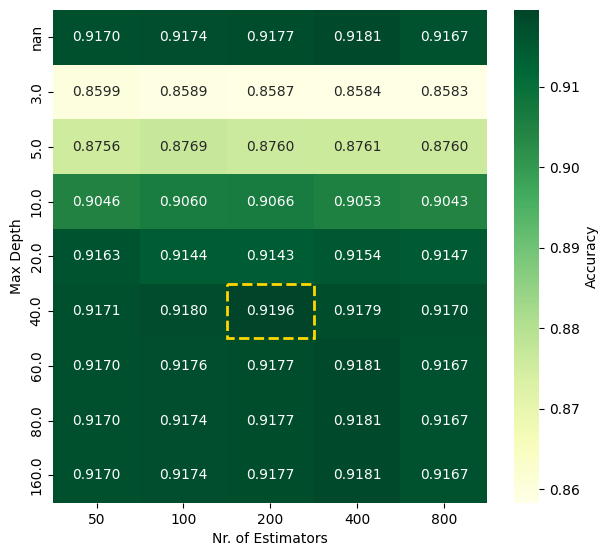

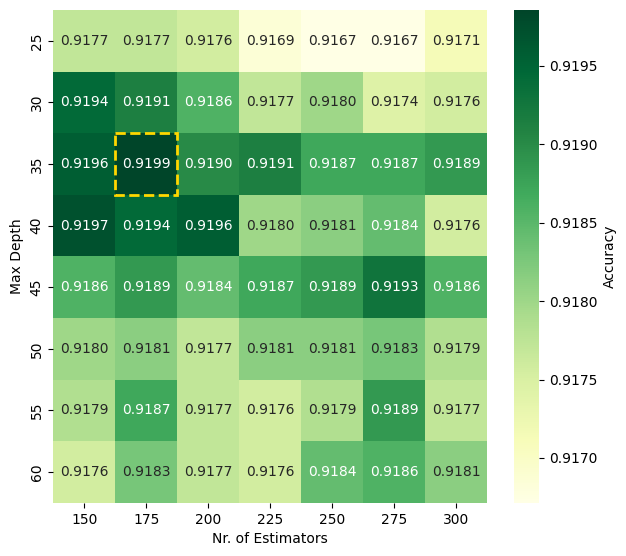

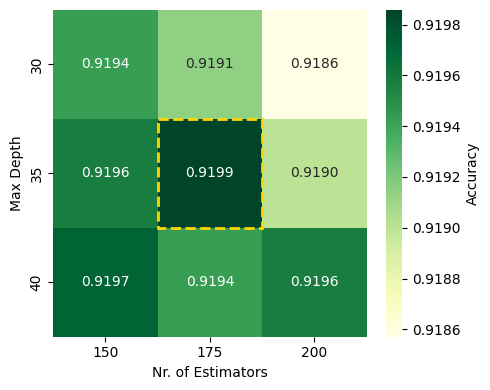

In [173]:
# random forest grid search

rf_gs = pd.read_csv('../grid_search_data/rf_grid_search_cv5_n_estimators_50_100_200_400_800_max_depth_3_5_10_20_40_60_80_160_None.csv')

heatmap_data = rf_gs.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")

# Plotting the heatmap
plt.figure(figsize=(7, 6.4))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGn", cbar_kws={'label': 'Accuracy'})

# Highlight the best score
max_val = heatmap_data.max().max()  # Find the maximum value in the pivoted data
best_loc = heatmap_data.stack().idxmax()

row, col = best_loc  # Unpack the tuple
col_idx = heatmap_data.columns.get_loc(col)  # Get column index
row_idx = heatmap_data.index.get_loc(row)  # Get row index
rect = Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='gold', lw=2, linestyle="--")
ax.add_patch(rect)

plt.xlabel("Nr. of Estimators")
plt.ylabel("Max Depth")
plt.show()


# random forest zoomed grid search

rf_gs = pd.read_csv('../grid_search_data/rf_zoomed_grid_search_cv5_n_estimators_150_175_200_225_250_275_300_max_depth_25_30_35_40_45_50_55_60.csv')


heatmap_data = rf_gs.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")

# Plotting the heatmap
plt.figure(figsize=(7, 6.4))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGn", cbar_kws={'label': 'Accuracy'})

# Highlight the best score
max_val = heatmap_data.max().max()  # Find the maximum value in the pivoted data
best_loc = heatmap_data.stack().idxmax()

row, col = best_loc  # Unpack the tuple
col_idx = heatmap_data.columns.get_loc(col)  # Get column index
row_idx = heatmap_data.index.get_loc(row)  # Get row index
rect = Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='gold', lw=2, linestyle="--")
ax.add_patch(rect)

plt.xlabel("Nr. of Estimators")
plt.ylabel("Max Depth")
plt.show()


# random forest for results section

selected_max_depth = [30, 35, 40]  
selected_estimators = [150, 175, 200]  
# Filter the DataFrame based on selected values
filtered_rf_gs = rf_gs[rf_gs["param_max_depth"].isin(selected_max_depth) & rf_gs["param_n_estimators"].isin(selected_estimators)]

# Pivot the filtered data
heatmap_data = filtered_rf_gs.pivot(index="param_max_depth", columns="param_n_estimators", values="mean_test_score")

# Plotting the heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGn", cbar_kws={'label': 'Accuracy'})

# Highlight the best score
max_val = heatmap_data.max().max()  # Find the maximum value in the pivoted data
best_loc = heatmap_data.stack().idxmax()

row, col = best_loc  # Unpack the tuple
col_idx = heatmap_data.columns.get_loc(col)  # Get column index
row_idx = heatmap_data.index.get_loc(row)  # Get row index
rect = Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='gold', lw=2, linestyle="--")
ax.add_patch(rect)

plt.xlabel("Nr. of Estimators")
plt.ylabel("Max Depth")
plt.tight_layout()
plt.savefig('../figures/rf_gs_results.pdf')
plt.show()

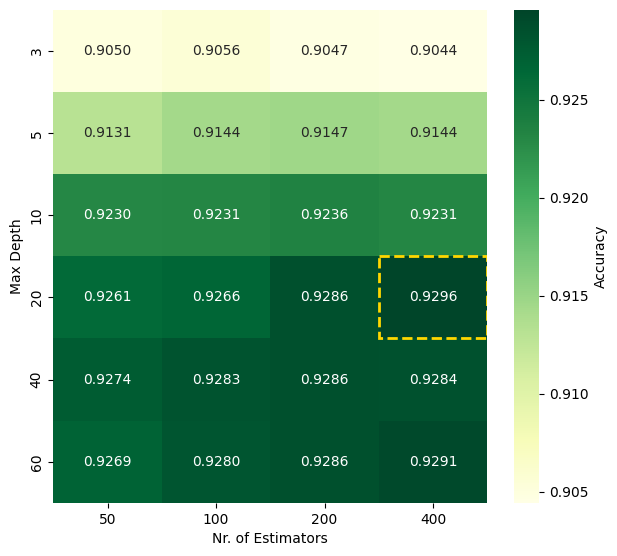

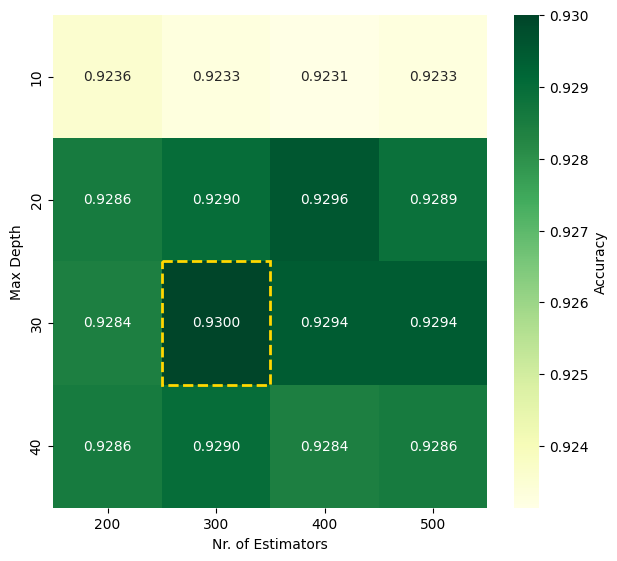

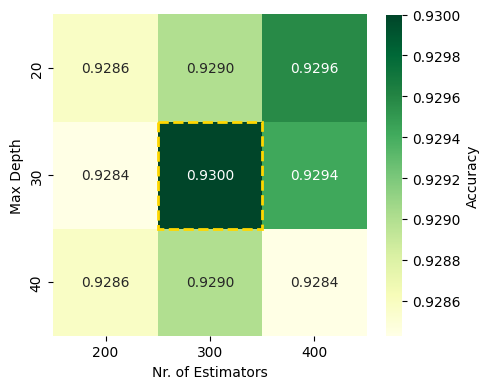

In [174]:
# bagging grid search

bagging_gs = pd.read_csv('../grid_search_data/bagging_grid_search_cv5_n_estimators_50_100_200_400_estimator__max_depth_3_5_10_20_40_60.csv')

heatmap_data = bagging_gs.pivot(index="param_estimator__max_depth", columns="param_n_estimators", values="mean_test_score")

# Plotting the heatmap
plt.figure(figsize=(7, 6.4))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGn", cbar_kws={'label': 'Accuracy'})

# Highlight the best score
max_val = heatmap_data.max().max()  # Find the maximum value in the pivoted data
best_loc = heatmap_data.stack().idxmax()

row, col = best_loc  # Unpack the tuple
col_idx = heatmap_data.columns.get_loc(col)  # Get column index
row_idx = heatmap_data.index.get_loc(row)  # Get row index
rect = Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='gold', lw=2, linestyle="--")
ax.add_patch(rect)

plt.xlabel("Nr. of Estimators")
plt.ylabel("Max Depth")
plt.show()


# bagging grid search zoom

bagging_gs = pd.read_csv('../grid_search_data/bagging_zoomed_grid_search_cv5_n_estimators_200_300_400_500_estimator__max_depth_10_20_30_40.csv')

heatmap_data = bagging_gs.pivot(index="param_estimator__max_depth", columns="param_n_estimators", values="mean_test_score")

# Plotting the heatmap
plt.figure(figsize=(7, 6.4))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGn", cbar_kws={'label': 'Accuracy'})

# Highlight the best score
max_val = heatmap_data.max().max()  # Find the maximum value in the pivoted data
best_loc = heatmap_data.stack().idxmax()

row, col = best_loc  # Unpack the tuple
col_idx = heatmap_data.columns.get_loc(col)  # Get column index
row_idx = heatmap_data.index.get_loc(row)  # Get row index
rect = Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='gold', lw=2, linestyle="--")
ax.add_patch(rect)

plt.xlabel("Nr. of Estimators")
plt.ylabel("Max Depth")
plt.show()


# bagging grid search for results

selected_max_depth = [20, 30, 40]  
selected_estimators = [200,300,400]  
# Filter the DataFrame based on selected values
filtered_bagging_gs = bagging_gs[bagging_gs["param_estimator__max_depth"].isin(selected_max_depth) & bagging_gs["param_n_estimators"].isin(selected_estimators)]

heatmap_data = filtered_bagging_gs.pivot(index="param_estimator__max_depth", columns="param_n_estimators", values="mean_test_score")

# Plotting the heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGn", cbar_kws={'label': 'Accuracy'})

# Highlight the best score
max_val = heatmap_data.max().max()  # Find the maximum value in the pivoted data
best_loc = heatmap_data.stack().idxmax()

row, col = best_loc  # Unpack the tuple
col_idx = heatmap_data.columns.get_loc(col)  # Get column index
row_idx = heatmap_data.index.get_loc(row)  # Get row index
rect = Rectangle((col_idx, row_idx), 1, 1, fill=False, edgecolor='gold', lw=2, linestyle="--")
ax.add_patch(rect)

plt.xlabel("Nr. of Estimators")
plt.ylabel("Max Depth")
plt.tight_layout()
plt.savefig('../figures/bagging_gs_results.pdf')
plt.show()